In [1]:
# Finalized Rate Plot (Claustrum 6)


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from pathlib import Path
data_folder = Path('Z:\\Maxime Chevee\Maxime 3\Analysis\Analysis OptoTagged 20180411')
file_to_open = data_folder / "master_log_lite.pkl"
with open(file_to_open, 'rb') as f:
   master_log = pickle.load(f, encoding='latin1')
   
list(master_log)
#master_log_lite=master_log[
#['mouse_name',
# 'date',
# 'block_type',
# 'trial_type',
# 'touch_stimulus',
# 'vis_stimulus',
# 'response',
# 'trial_num',
# 'stim_onset',
# 'stim_offset',
# 'licks_right',
# 'licks_left',
# 'spike_times',
# 'cluster_name',
# '-0.5to2.0sec_25msecbins_StimAligned',
# 'Category',
# '-1to3sec_25msecbins_StimAligned',
#  'Stim/Block/Response',
# 'Reward',
# 'rewarded_licks',
# 'non_rewarded_licks',
# 'unit_name',
# 'LeftFirstLick',
# 'RightFirstLick',
# 'FirstLick',
# '-1to3sec_25msecbins_LickAligned',
#  'LickALigned_spike_times']]

['mouse_name',
 'date',
 'block_type',
 'trial_type',
 'touch_stimulus',
 'vis_stimulus',
 'response',
 'trial_num',
 'stim_onset',
 'stim_offset',
 'licks_right',
 'licks_left',
 'spike_times',
 'cluster_name',
 '-0.5to2.0sec_25msecbins_StimAligned',
 'Category',
 '-1to3sec_25msecbins_StimAligned',
 'Stim/Block/Response',
 'Reward',
 'rewarded_licks',
 'non_rewarded_licks',
 'unit_name',
 'LeftFirstLick',
 'RightFirstLick',
 'FirstLick',
 '-1to3sec_25msecbins_LickAligned',
 'LickALigned_spike_times']

In [3]:
unit6_10_26 = master_log[master_log['unit_name']=='Cl6_10-26-17_TT1clst2']

unit6_10_26['block_type']

1       [Whisker]
24      [Whisker]
47      [Whisker]
70      [Whisker]
93      [Whisker]
116     [Whisker]
139     [Whisker]
162     [Whisker]
185     [Whisker]
208     [Whisker]
231     [Whisker]
254     [Whisker]
277     [Whisker]
300     [Whisker]
323     [Whisker]
346     [Whisker]
369     [Whisker]
392     [Whisker]
415     [Whisker]
438     [Whisker]
461     [Whisker]
484     [Whisker]
507     [Whisker]
530     [Whisker]
553     [Whisker]
576     [Whisker]
599     [Whisker]
622     [Whisker]
645     [Whisker]
668     [Whisker]
          ...    
6211     [Visual]
6234     [Visual]
6257     [Visual]
6280     [Visual]
6303     [Visual]
6326     [Visual]
6349     [Visual]
6372     [Visual]
6395     [Visual]
6418     [Visual]
6441     [Visual]
6464     [Visual]
6487     [Visual]
6510     [Visual]
6533     [Visual]
6556     [Visual]
6579     [Visual]
6602     [Visual]
6625     [Visual]
6648     [Visual]
6671     [Visual]
6694     [Visual]
6717     [Visual]
6740     [Visual]
6763     [

In [4]:
def frac_calc(response_type, data_frame):
    i = 0.
    count = 0.
    fracArr = [0.] * (data_frame.shape[0]+1)
    while (i < data_frame.shape[0]):
        if (data_frame['Stim/Block/Response'].iloc[int(i)] == response_type[0] or data_frame['Stim/Block/Response'].iloc[int(i)] == response_type[1]):
            count += 1
        i += 1
        fracArr[int(i)] = count/i
    return fracArr

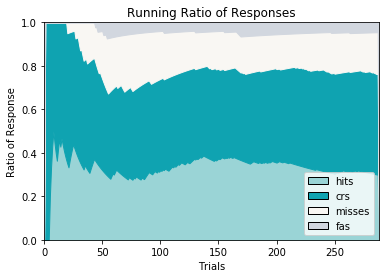

In [36]:
# Cl6_10-26-17
unit6_10_26 = master_log[master_log['unit_name']=='Cl6_10-29-17_TT1clst2']

MissFrac = frac_calc(list({'SomMiss', 'VisMiss'}), unit6_10_26)
FAFrac = frac_calc(list({'SomFA', 'VisFA'}), unit6_10_26)
CRFrac = frac_calc(list({'SomCR', 'VisCR'}), unit6_10_26)
HitFrac = frac_calc(list({'SomHit', 'VisHit'}), unit6_10_26)


line1 = [0.] * (unit6_10_26.shape[0]+1)
line2 = [0.] * (unit6_10_26.shape[0]+1)
line3 = [0.] * (unit6_10_26.shape[0]+1)

for i in range(unit6_10_26.shape[0]):
    line1[i] = HitFrac[i]
    line2[i] = HitFrac[i]+CRFrac[i]
    line3[i] = HitFrac[i]+CRFrac[i]+MissFrac[i]

x = list(np.arange(unit6_10_26.shape[0]+1, dtype=float))
y_base = [0.] * (unit6_10_26.shape[0]+1)
y_max = [1.] * (unit6_10_26.shape[0]+1)
fig1 = plt.figure()
ax1 = fig1.subplots()    
ax1.fill_between(x, y_base, line1, color = '#9AD4D6', label = 'hits')
ax1.fill_between(x, line1, line2, color = '#0FA3B1', label = 'crs')
ax1.fill_between(x, line2, line3, color = '#F9F7F3', label = 'misses')
ax1.fill_between(x, line3, y_max, color = '#D2D7DF', label = 'fas')

plt.xlim(0,unit6_10_26.shape[0])
plt.ylim(0,1)

r1 = Rectangle((0, 0), 1, 1, color = '#9AD4D6', ec = 'black')
r2 = Rectangle((0, 0), 1, 1, color = '#0FA3B1', ec = 'black')
r3 = Rectangle((0, 0), 1, 1, color = '#F9F7F3', ec = 'black')
r4 = Rectangle((0, 0), 1, 1, color = '#D2D7DF', ec = 'black')

plt.xlabel('Trials')
plt.ylabel('Ratio of Response')
plt.title('Running Ratio of Responses')

legend1 = plt.legend([r1, r2, r3, r4], ["hits", "crs", "misses", "fas"], loc='lower right')
